In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

WIDTH, HEIGHT = 18, 24

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (WIDTH, HEIGHT)


In [2]:
def mirror_coords(X, Y, axis='x'):
    """
    Returns coordinates mirrored along the specified axis.
    """
    if axis == 'x':
        return [WIDTH-x for x in X], Y
    elif axis == 'y':
        return X, [HEIGHT-y for y in Y]


def linspace_coords(X, Y, n):
    """
    Returns n evenly spaced points between two intervals.
    """
    return np.linspace(X[0], X[1], n), np.linspace(Y[0], Y[1], n)


def plot_line(X, Y, mirror=True, mirror_axis='x', color='black'):
    """
    Plots a line between using matplotlib, optionally with its mirror as well.
    """
    X_coords, Y_coords = linspace_coords(X, Y, n_markers)
    plt.plot(X_coords, Y_coords, color=color, lw=0.5)

    if mirror:
        X_mirror, Y_mirror = mirror_coords(X, Y, axis=mirror_axis)
        X_mirror_coords, Y_mirror_coords = linspace_coords(X_mirror, Y_mirror, n_markers)
        plt.plot(X_mirror_coords, Y_mirror_coords, color=color, lw=0.5)


def get_points(X, Y, num):
    """
    Converts axis-based coordinate lists to a list of (X,Y) Cartesian coordinate tuples.
    """
    return list(zip(*linspace_coords(X, Y, num)))


def connect_points(A, B, color='black'):
    """
    Plots a line between two points written with Cartesian coordinates.
    """
    plt.plot([A[0], B[0]], [A[1], B[1]], color=color, lw=0.5)


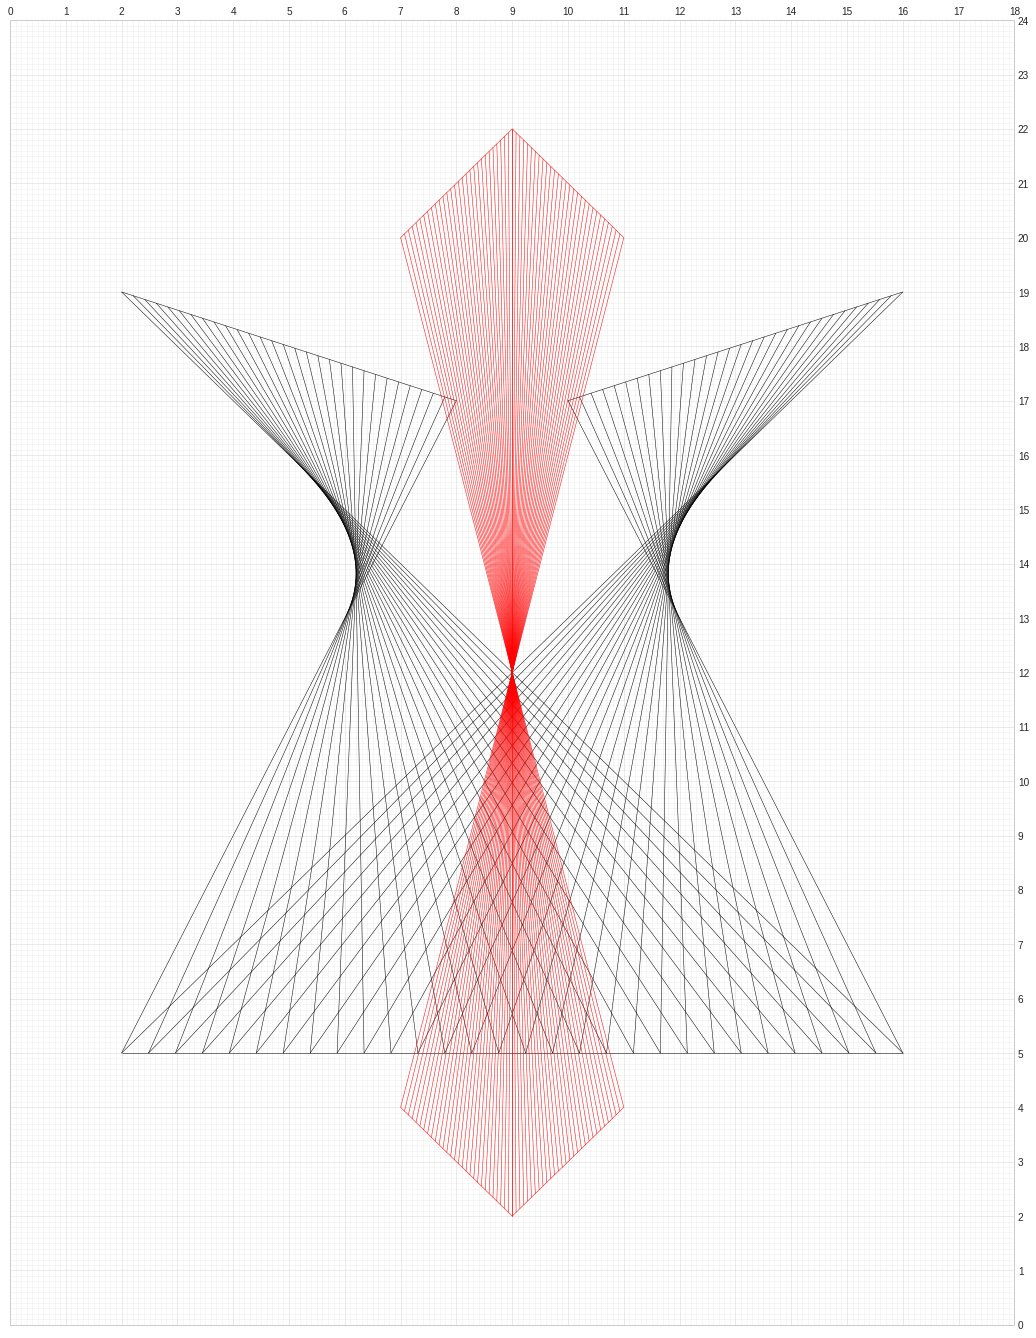

In [3]:
# "Graph paper" setup
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(0, HEIGHT+1, 1)
minor_ticks = np.arange(0, HEIGHT+1, 0.1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.xaxis.tick_top()
ax.yaxis.tick_right()

plt.xlim((0, WIDTH))
plt.ylim((0, HEIGHT))

#######################################

n_markers = 30

### BLACK

# slanting line definition
X_line1, Y_line1 = [2, 8], [19, 17]
# flat line definition
X_base1, Y_base1 = [2, 16], [5, 5]

# draw the slanting line, mirror it along the x axis
plot_line(X_line1, Y_line1, mirror=True, mirror_axis='x')
# draw the flat line without a mirror
plot_line(X_base1, Y_base1, mirror=False)

# get coords on the slanting line
line1_points = get_points(X_line1, Y_line1, n_markers)
# get coords on the mirror of the slanting line
line1m_points = get_points(
    *mirror_coords(X_line1, Y_line1, axis='x'), n_markers)
# get coords on the flat line
base1_points = get_points(X_base1, Y_base1, n_markers)

# connect the points on the slanting line (L-R) with the points on the flat line (R-L)
for src, dst in zip(line1_points, base1_points[::-1]):
    connect_points(src, dst)
# connect the points on the mirrored slanting line (R-L) with the points on the flat line (L-R)
for src, dst in zip(line1m_points, base1_points):
    connect_points(src, dst)

### RED

X_line2, Y_line2 = [7, 9], [20, 22]
X_line3, Y_line3 = [9, 11], [2, 4]

plot_line(X_line2, Y_line2, mirror=True, mirror_axis='x', color='red')
plot_line(X_line3, Y_line3, mirror=True, mirror_axis='x', color='red')

line2_points = get_points(X_line2, Y_line2, n_markers)
line2m_points = get_points(*mirror_coords(X_line2, Y_line2), n_markers)
line3_points = get_points(X_line3, Y_line3, n_markers)
line3m_points = get_points(*mirror_coords(X_line3, Y_line3), n_markers)

for src, dst in zip(line2_points, line3_points[::-1]):
    connect_points(src, dst, color='red')

for src, dst in zip(line2m_points, line3m_points[::-1]):
    connect_points(src, dst, color='red')

plt.show()
